F1-score (avg): 0.579630895420369  std: 0.15024573717938394
Accuracy (avg): 0.8409090909090908  std: 0.03214121732666126

F1-scores per fold: [0.76190476 0.52631579 0.66666667 0.36363636]
Accuracies per fold: [0.88636364 0.79545455 0.84090909 0.84090909]


C:\Users\Administrator\AppData\Local\Temp\ipykernel_21924\2103291128.py:39: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([scores['test_f1'], scores['test_accuracy']], labels=['F1-score', 'Accuracy'])


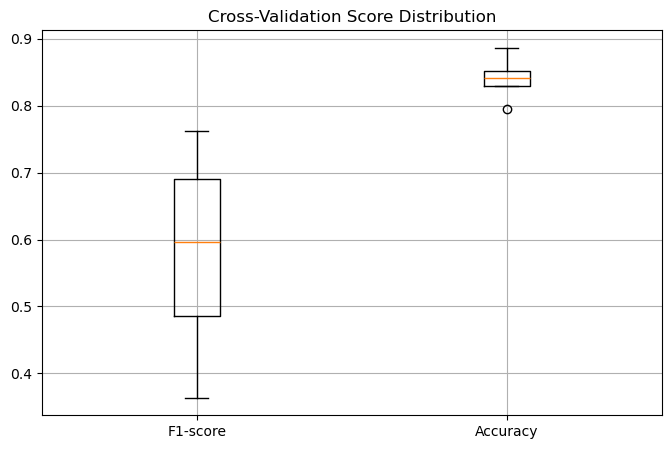

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
from sklearn.neural_network import MLPClassifier



data = pd.read_csv('../data/train_robot_v1.csv')
X = data.drop(columns=["Target"])
y = data["Target"]


model = MLPClassifier(
    hidden_layer_sizes=(50,25,12),   # 隐藏层结构，改成 (100,), (50, 50), (100, 50, 25) 等试不同结构
    activation='relu',          # 激活函数,activation 换成 'tanh',relu,'logistic' 看是否更适合
    solver='lbfgs',              # 优化器adam,lbfgs,sgd
    max_iter=500,               # 最大迭代次数
    random_state=42,             # 固定随机种子
    
    
)

# 计算 F1 和 Accuracy
scoring = {'f1': 'f1', 'accuracy': 'accuracy'}
scores = cross_validate(model, X, y, cv=4, scoring=scoring)

print("F1-score (avg):", scores['test_f1'].mean(), " std:", scores['test_f1'].std())
print("Accuracy (avg):", scores['test_accuracy'].mean(), " std:", scores['test_accuracy'].std())

# 每个fold的结果
print("\nF1-scores per fold:", scores['test_f1'])
print("Accuracies per fold:", scores['test_accuracy'])

# ----------------------
# 5. 可视化分布（F1 和 Accuracy）
# ----------------------
plt.figure(figsize=(8, 5))
plt.boxplot([scores['test_f1'], scores['test_accuracy']], labels=['F1-score', 'Accuracy'])
plt.title("Cross-Validation Score Distribution")
plt.grid(True)
plt.show()
